# 1단계: 탐색적 데이터 분석 (EDA)

## 📊 California Housing Dataset 분석

이 노트북에서는 California Housing Dataset을 로드하고 기초적인 탐색적 데이터 분석을 수행합니다.

### 학습 목표
1. California Housing Dataset 이해하기
2. 데이터의 기본 통계량 파악
3. 결측값 및 이상치 확인
4. 특성 간의 상관관계 분석
5. 데이터 시각화

In [1]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import fetch_california_housing
import sys
import os

# 상위 디렉토리의 src 폴더를 경로에 추가
sys.path.append('../src')

# 한글 폰트 설정
try:
    from font_setup import setup_korean_font
    setup_korean_font()
except:
    # 한글 폰트 설정이 실패하면 영어로 표시
    plt.rcParams['font.family'] = 'DejaVu Sans'
    print("⚠️ Korean font setup failed. Using English labels.")

# 시각화 설정
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# pandas 표시 옵션
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

print("✅ Library import completed")

✅ 한글 폰트 설정 완료: Malgun Gothic
✅ Library import completed


In [2]:
# California Housing Dataset 로드
california_housing = fetch_california_housing()

# 데이터셋 정보 출력
print("📈 California Housing Dataset")
print(f"Number of features: {len(california_housing.feature_names)}")
print(f"Number of samples: {california_housing.data.shape[0]}")
print(f"Target variable: {california_housing.target_names}")

print("\n🏷️ Feature names:")
for i, feature in enumerate(california_housing.feature_names):
    print(f"{i+1:2d}. {feature}")

📈 California Housing Dataset
Number of features: 8
Number of samples: 20640
Target variable: ['MedHouseVal']

🏷️ Feature names:
 1. MedInc
 2. HouseAge
 3. AveRooms
 4. AveBedrms
 5. Population
 6. AveOccup
 7. Latitude
 8. Longitude


In [3]:
# 데이터프레임 생성
df = pd.DataFrame(
    california_housing.data, 
    columns=california_housing.feature_names
)
df['MedHouseVal'] = california_housing.target

print("📊 DataFrame basic information")
print(f"Data shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 처음 5행 표시
print("\n🔍 First 5 rows:")
df.head()

📊 DataFrame basic information
Data shape: (20640, 9)
Memory usage: 1.42 MB

🔍 First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.325,41.0,6.984,1.024,322.0,2.556,37.88,-122.23,4.526
1,8.301,21.0,6.238,0.972,2401.0,2.110,37.86,-122.22,3.585
2,7.257,52.0,8.288,1.073,496.0,2.802,37.85,-122.24,3.521
3,5.643,52.0,5.817,1.073,558.0,2.548,37.85,-122.25,3.413
4,3.846,52.0,6.282,1.081,565.0,2.181,37.85,-122.25,3.422


In [4]:
# 데이터셋 설명 출력
print("📝 Dataset description:")
print(california_housing.DESCR[:1500])  # 처음 1500자만 표시

📝 Dataset description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. censu

In [5]:
# 기본 통계량 확인
print("📊 Basic statistics")
df.describe()

📊 Basic statistics


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000
mean,3.871,28.639,5.429,1.097,1425.477,3.071,35.632,-119.570,2.069
std,1.900,12.586,2.474,0.474,1132.462,10.386,2.136,2.004,1.154
min,0.500,1.000,0.846,0.333,3.000,0.692,32.540,-124.350,0.150
25%,2.563,18.000,4.441,1.006,787.000,2.430,33.930,-121.800,1.196
50%,3.535,29.000,5.229,1.049,1166.000,2.818,34.260,-118.490,1.797
75%,4.743,37.000,6.052,1.100,1725.000,3.282,37.710,-118.010,2.647
max,15.000,52.000,141.909,34.067,35682.000,1243.333,41.950,-114.310,5.000


In [6]:
# 데이터 타입 및 결측값 확인
print("🔍 Data types and missing values")
info_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(info_df)

🔍 Data types and missing values
            Data Type  Non-Null Count  Null Count  Null Percentage
MedInc        float64           20640           0              0.0
HouseAge      float64           20640           0              0.0
AveRooms      float64           20640           0              0.0
AveBedrms     float64           20640           0              0.0
Population    float64           20640           0              0.0
AveOccup      float64           20640           0              0.0
Latitude      float64           20640           0              0.0
Longitude     float64           20640           0              0.0
MedHouseVal   float64           20640           0              0.0


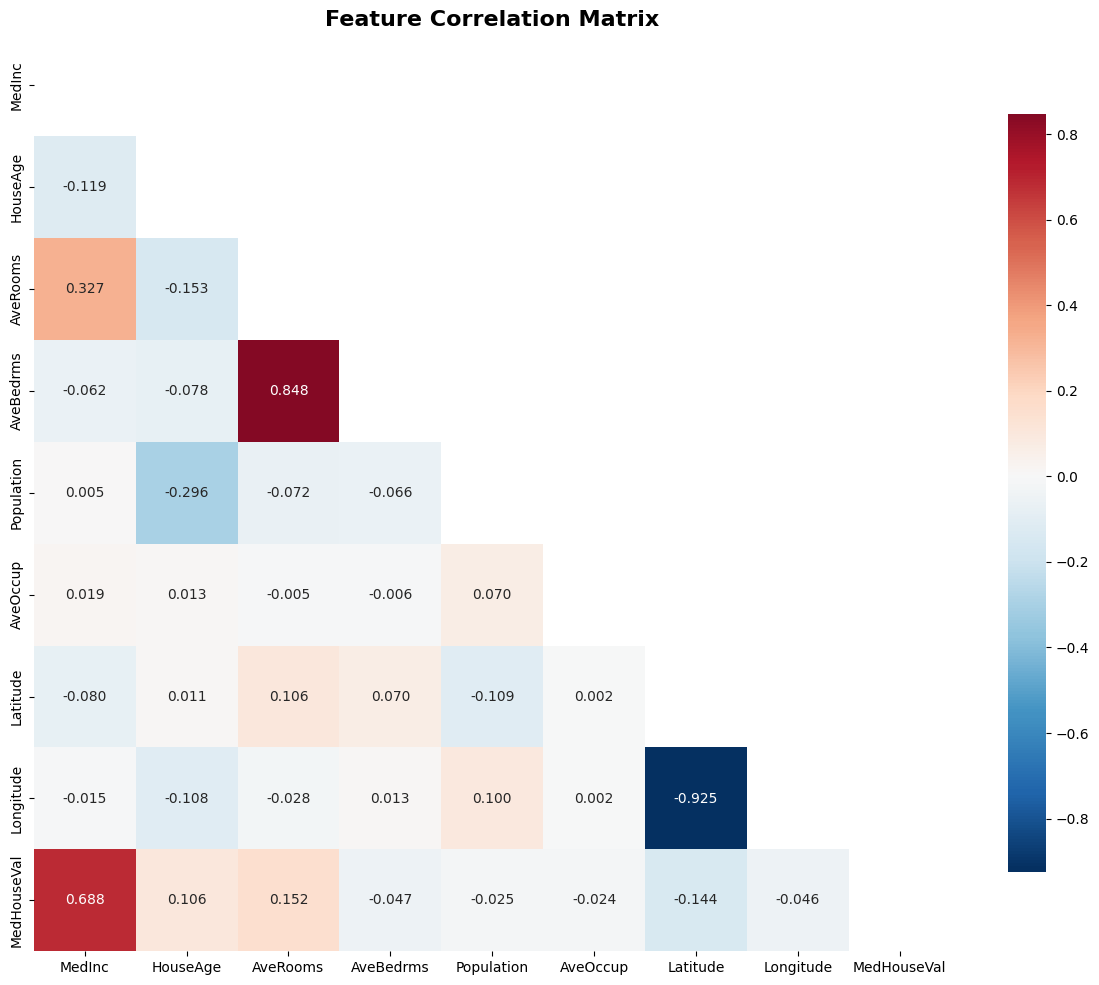


🎯 Correlation with target (House Price):
MedInc         : 0.688
AveRooms       : 0.152
Latitude       : 0.144
HouseAge       : 0.106
AveBedrms      : 0.047
Longitude      : 0.046
Population     : 0.025
AveOccup       : 0.024


In [7]:
# 상관관계 매트릭스
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

# 히트맵 생성
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix, 
    mask=mask,
    annot=True, 
    cmap='RdBu_r', 
    center=0,
    fmt='.3f',
    square=True,
    cbar_kws={"shrink": .8}
)
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 타겟과 높은 상관관계를 가진 특성 확인
target_corr = correlation_matrix['MedHouseVal'].abs().sort_values(ascending=False)
print("\n🎯 Correlation with target (House Price):")
for feature, corr in target_corr.items():
    if feature != 'MedHouseVal':
        print(f"{feature:15s}: {corr:.3f}")

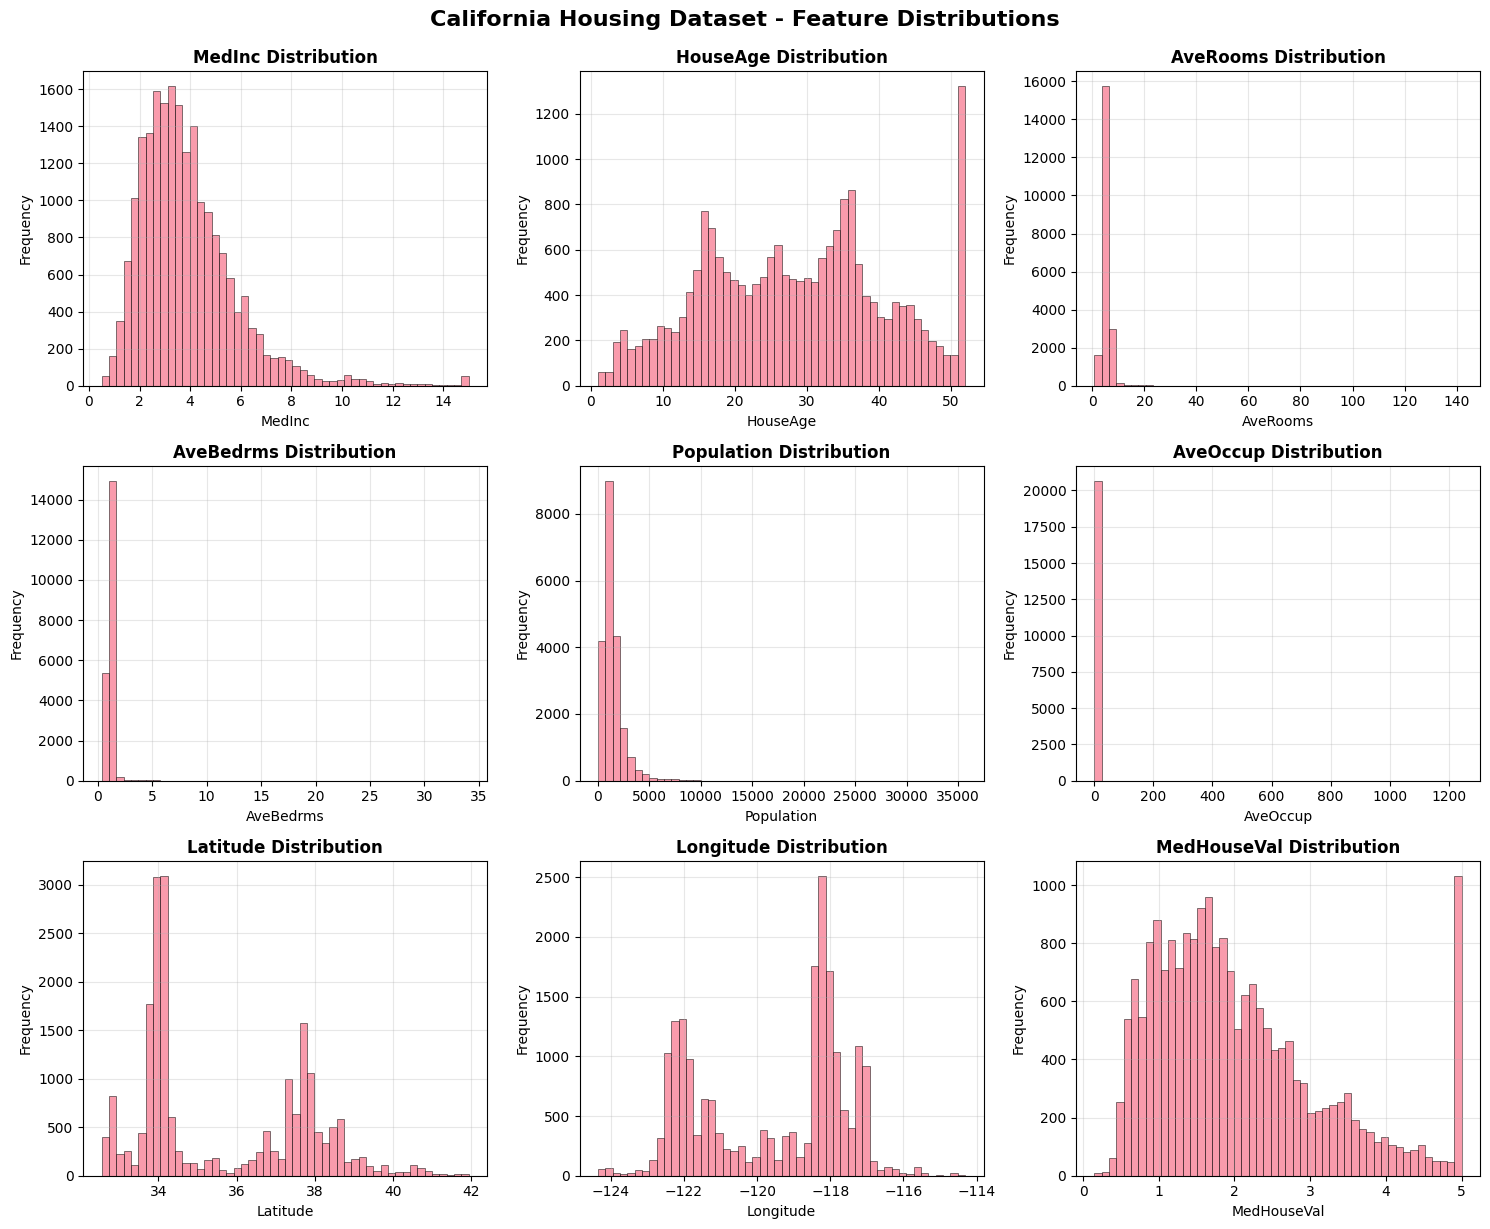

In [8]:
# 분포 시각화 - 히스토그램
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=50, alpha=0.7, edgecolor='black', linewidth=0.5)
    axes[i].set_title(f'{column} Distribution', fontweight='bold')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('California Housing Dataset - Feature Distributions', y=1.02, fontsize=16, fontweight='bold')
plt.show()

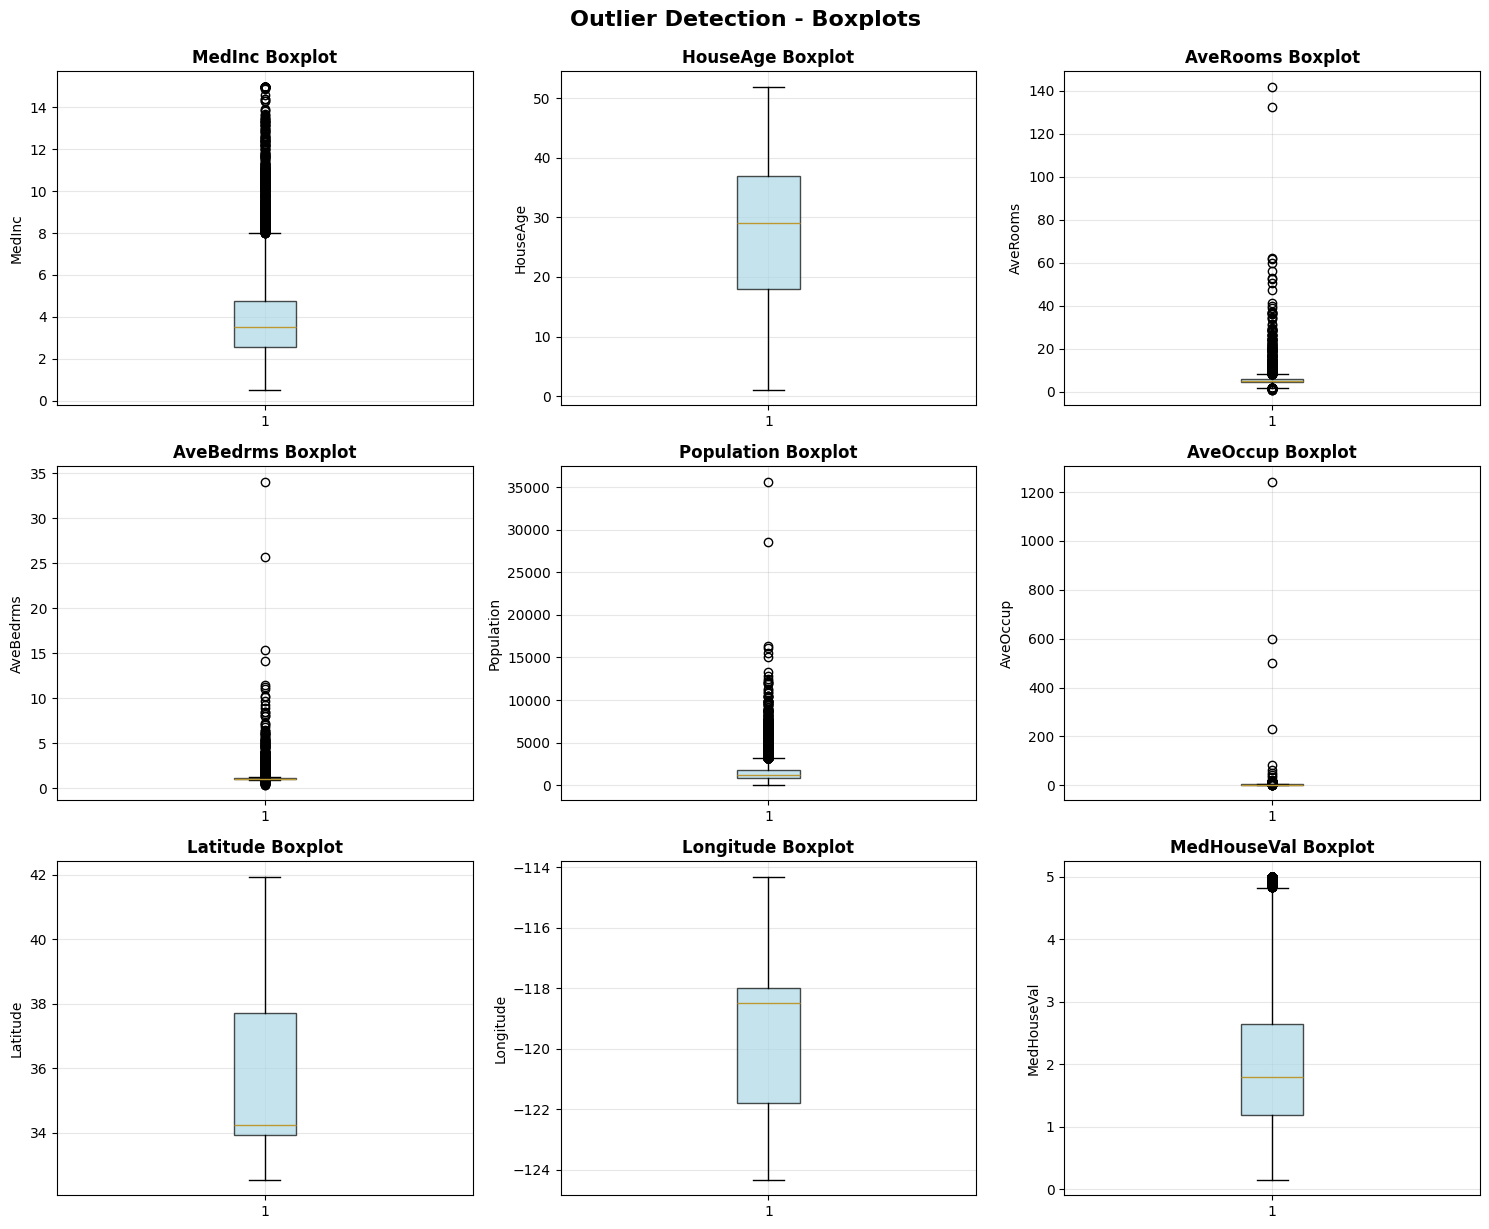

In [9]:
# 박스플롯으로 이상치 확인
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    bp = axes[i].boxplot(df[column], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    axes[i].set_title(f'{column} Boxplot', fontweight='bold')
    axes[i].set_ylabel(column)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Outlier Detection - Boxplots', y=1.02, fontsize=16, fontweight='bold')
plt.show()

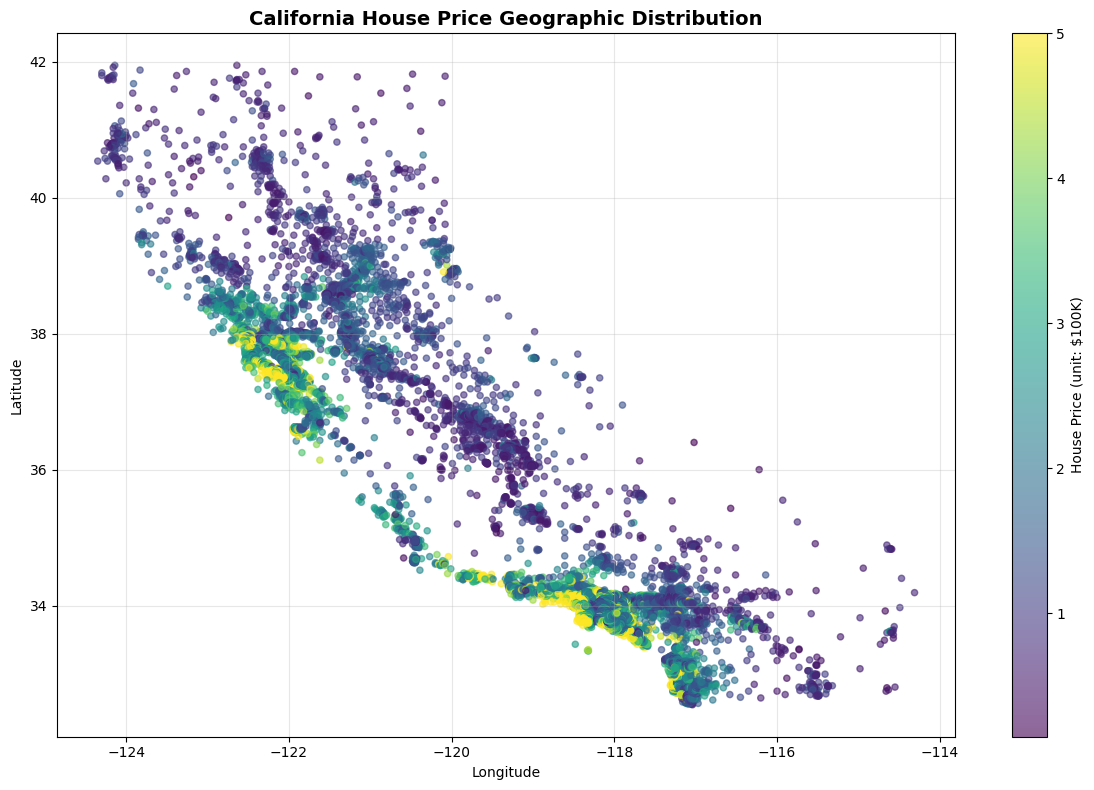

In [10]:
# 지리적 데이터 시각화 (위도, 경도 활용)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['Longitude'], 
    df['Latitude'], 
    c=df['MedHouseVal'], 
    cmap='viridis', 
    alpha=0.6,
    s=20
)
plt.colorbar(scatter, label='House Price (unit: $100K)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California House Price Geographic Distribution', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

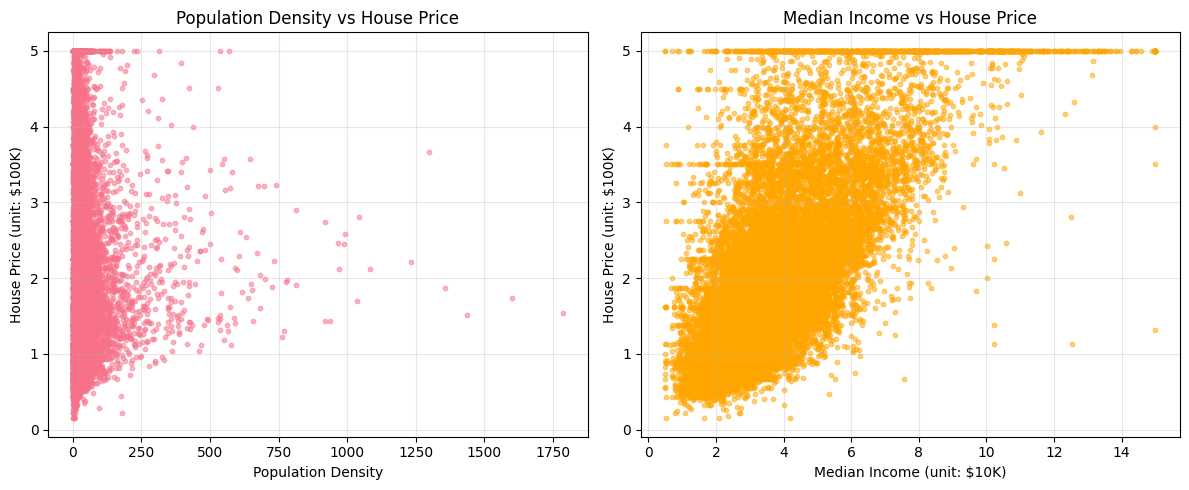

Population density vs House price correlation: 0.005
Median income vs House price correlation: 0.688


In [11]:
# 인구 밀도와 주택 가격의 관계
# 인구 밀도 = Population / (평균 가구당 인원 수 * 총 가구 수)
df['PopulationDensity'] = df['Population'] / (df['AveOccup'] * df['HouseAge'])

plt.figure(figsize=(12, 5))

# 서브플롯 1: 인구 밀도 vs 주택 가격
plt.subplot(1, 2, 1)
plt.scatter(df['PopulationDensity'], df['MedHouseVal'], alpha=0.5, s=10)
plt.xlabel('Population Density')
plt.ylabel('House Price (unit: $100K)')
plt.title('Population Density vs House Price')
plt.grid(True, alpha=0.3)

# 서브플롯 2: 평균 소득 vs 주택 가격
plt.subplot(1, 2, 2)
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.5, s=10, color='orange')
plt.xlabel('Median Income (unit: $10K)')
plt.ylabel('House Price (unit: $100K)')
plt.title('Median Income vs House Price')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 상관관계 확인
print(f"Population density vs House price correlation: {df['PopulationDensity'].corr(df['MedHouseVal']):.3f}")
print(f"Median income vs House price correlation: {df['MedInc'].corr(df['MedHouseVal']):.3f}")

In [12]:
# 주요 통계 요약
print("📋 Key Findings Summary")
print("=" * 50)
print(f"• Total data points: {len(df):,}")
print(f"• Number of features: {len(df.columns)-1}")
print(f"• Missing values: {'None' if df.isnull().sum().sum() == 0 else 'Present'}")
print(f"• House price range: ${df['MedHouseVal'].min():.1f}K ~ ${df['MedHouseVal'].max():.1f}K")
print(f"• Average house price: ${df['MedHouseVal'].mean():.1f}K")
print(f"• Median income range: ${df['MedInc'].min():.1f}K ~ ${df['MedInc'].max():.1f}K")

print("\n🔍 Important features (based on target correlation):")
important_features = target_corr.head(4).index.tolist()
important_features.remove('MedHouseVal')
for i, feature in enumerate(important_features, 1):
    corr_value = target_corr[feature]
    print(f"{i}. {feature}: {corr_value:.3f}")

print("\n✅ EDA completed! Next step: Compare normalization effects.")

📋 Key Findings Summary
• Total data points: 20,640
• Number of features: 9
• Missing values: None
• House price range: $0.1K ~ $5.0K
• Average house price: $2.1K
• Median income range: $0.5K ~ $15.0K

🔍 Important features (based on target correlation):
1. MedInc: 0.688
2. AveRooms: 0.152
3. Latitude: 0.144

✅ EDA completed! Next step: Compare normalization effects.


In [13]:
# 데이터 저장 (다음 단계에서 사용)
df.to_csv('../data/california_housing_processed.csv', index=False)
print("💾 Processed data saved to 'data/california_housing_processed.csv'")

💾 Processed data saved to 'data/california_housing_processed.csv'
